In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from fastsst import SingularSpectrumTransformation

## ECG

In [299]:
ecgs = glob("all_data/ECG_data/*.txt")

In [300]:
ecgs

['all_data/ECG_data/xmitdb_x108_0.txt',
 'all_data/ECG_data/chfdb_chf01_275.txt',
 'all_data/ECG_data/mitdb__100_180.txt',
 'all_data/ECG_data/chfdb_chf13_45590.txt',
 'all_data/ECG_data/stdb_308_0.txt',
 'all_data/ECG_data/ltstdb_20321_240.txt',
 'all_data/ECG_data/ltstdb_20221_43.txt']

In [99]:
ecg_datasets = []
for ecg in ecgs:
    df = pd.read_csv(ecg,header=None,delimiter="\t")
    if df.shape[1] == 1:
        ecg_datasets.append(df.values)
    else:
        # omit index
        ecg_datasets.append(df.values[:,1:])

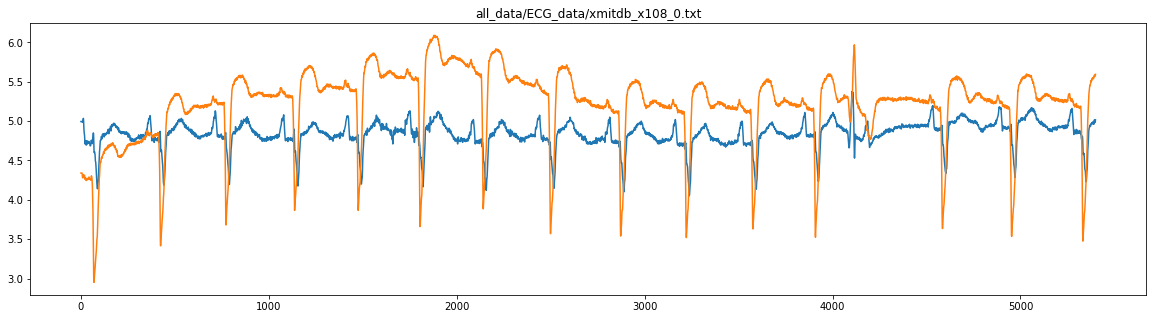

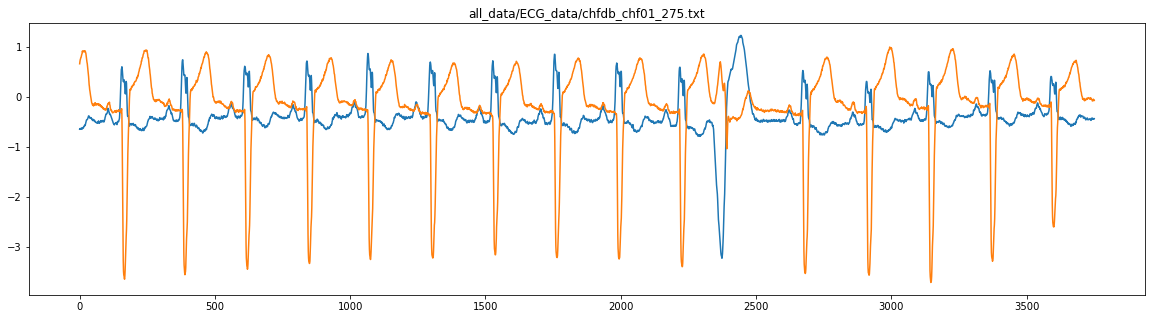

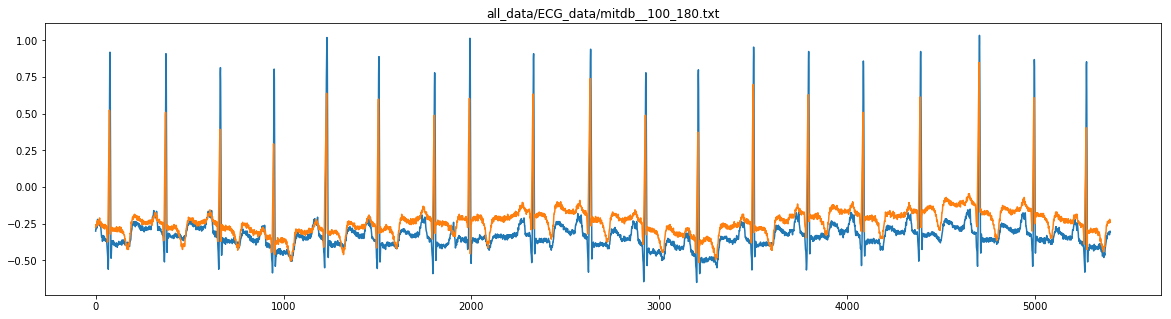

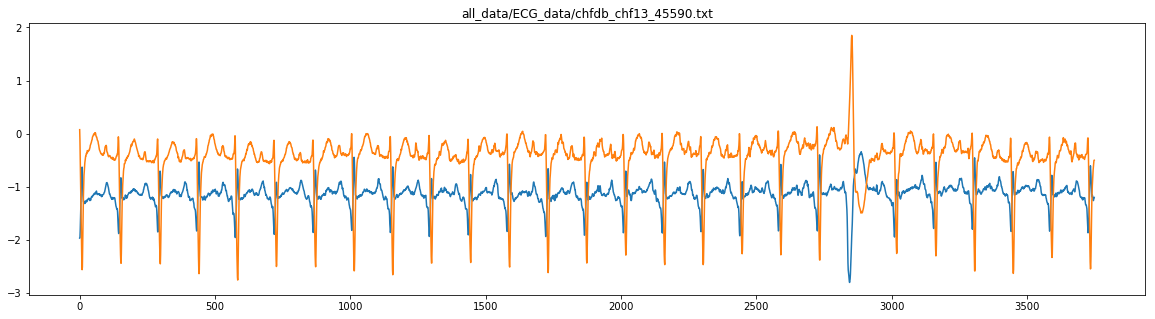

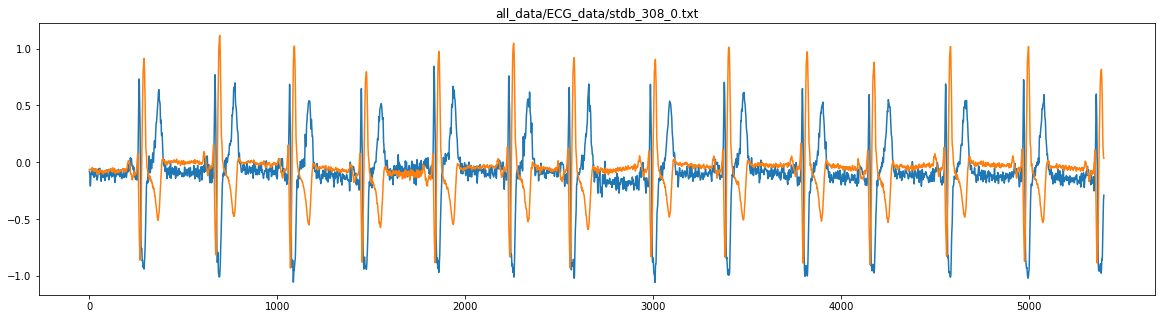

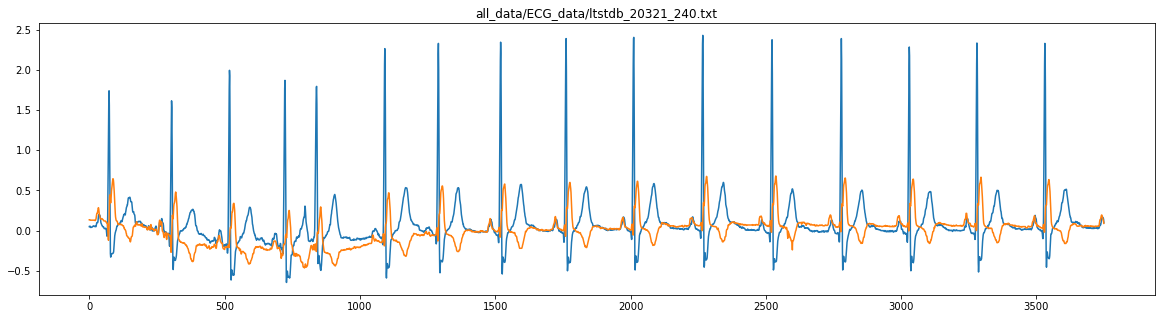

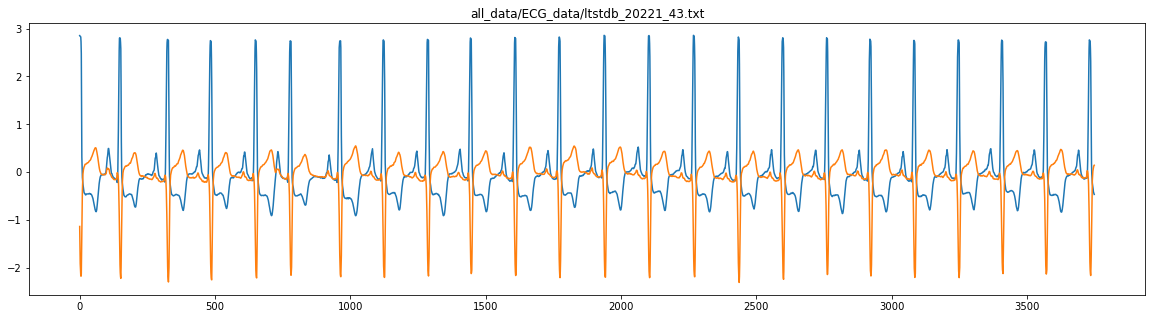

In [102]:
for idx,ecg_data in enumerate(ecg_datasets):
    plt.figure(figsize=(20,5))
    plt.plot(ecg_data)
    plt.title(ecgs[idx])

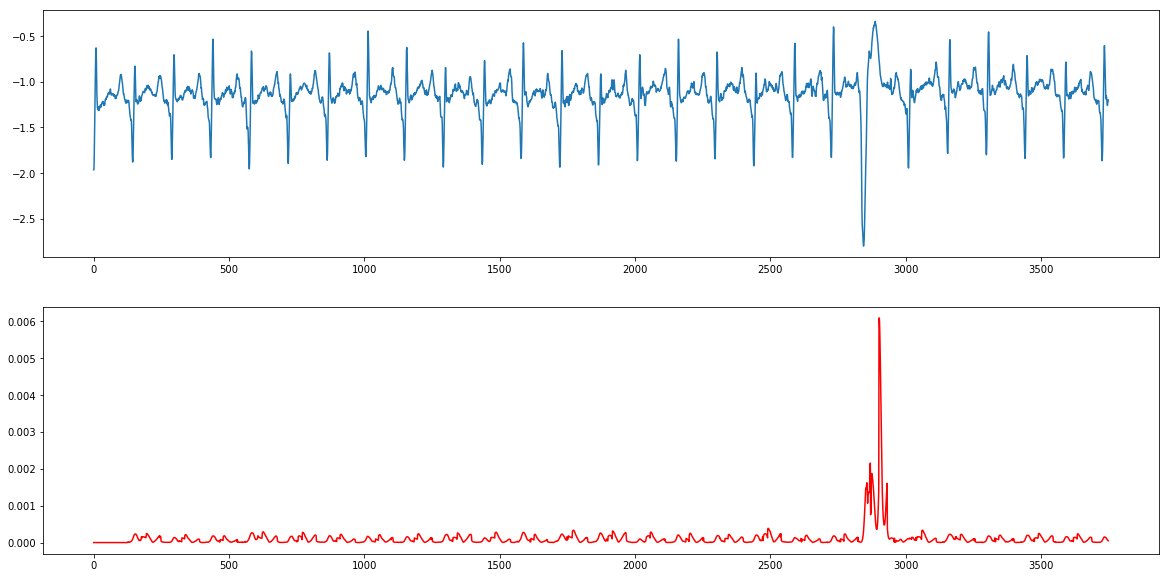

In [281]:
x = ecg_datasets[3][:,0]
# sst = SingularSpectrumTransformation(win_length=35,order=35,lag=350,n_components=5)
sst = SingularSpectrumTransformation(win_length=50,order=50)
score = sst.score_offline(x)

f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x);
ax[1].plot(score,"r")

## Others

In [141]:
paths = glob("all_data/*.txt")
paths

['all_data/chfdbchf15.txt',
 'all_data/TEK14.txt',
 'all_data/TEK16.txt',
 'all_data/TEK17.txt',
 'all_data/mitdbx_mitdbx_108.txt',
 'all_data/qtdbsel102.txt',
 'all_data/power_data.txt',
 'all_data/nprs43.txt',
 'all_data/qtdbsele0606.txt',
 'all_data/nprs44.txt',
 'all_data/ann_gun_CentroidA.txt']

In [149]:
datasets = []
for path in paths:
    if path not in ('all_data/ann_gun_CentroidA.txt', 'all_data/mitdbx_mitdbx_108.txt'):
        df = pd.read_csv(path,delimiter="\t")
        if df.shape[1] == 1:
            datasets.append(df.values)
        else:
            # omit index
            datasets.append(df.values[:,1:])
    else:
        df = pd.read_csv(path,delimiter="\s\s")
        datasets.append(df.values[:,1:])

/Users/apple/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


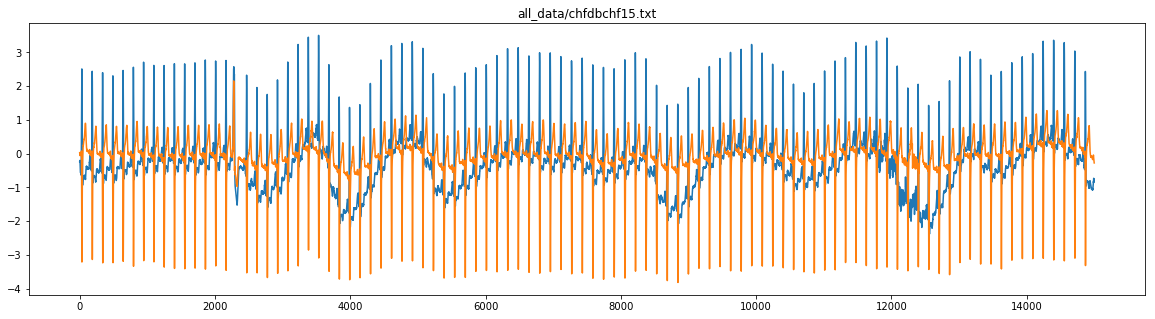

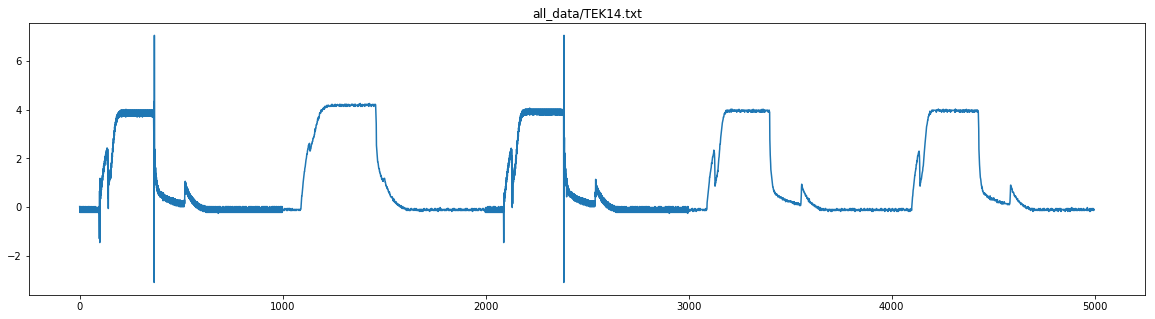

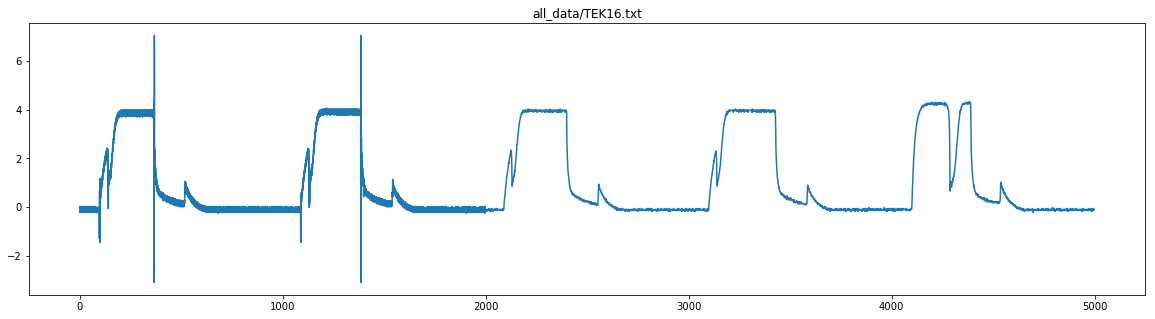

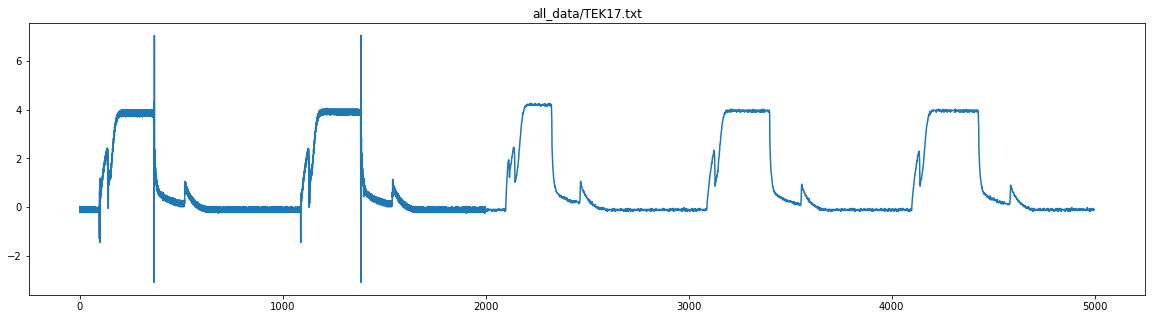

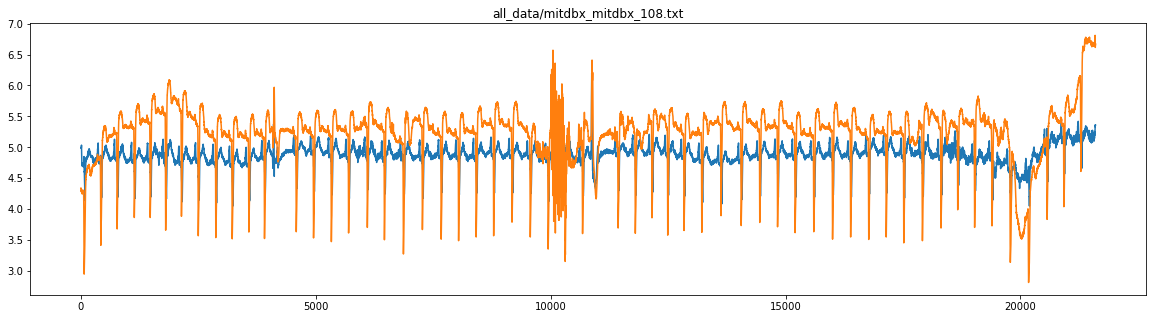

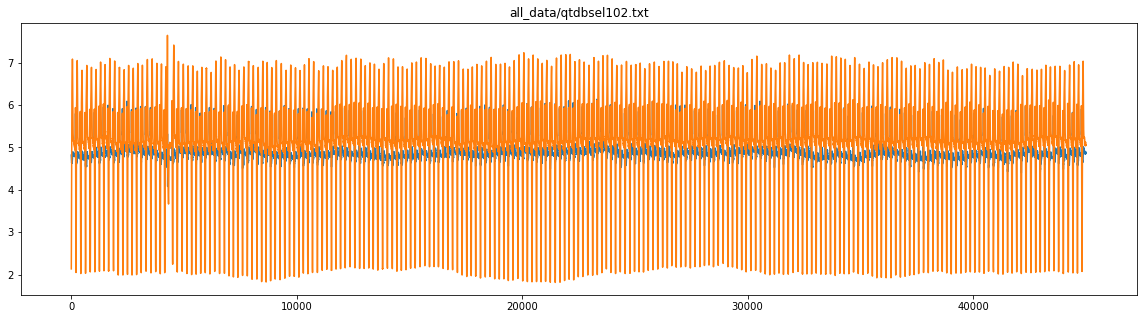

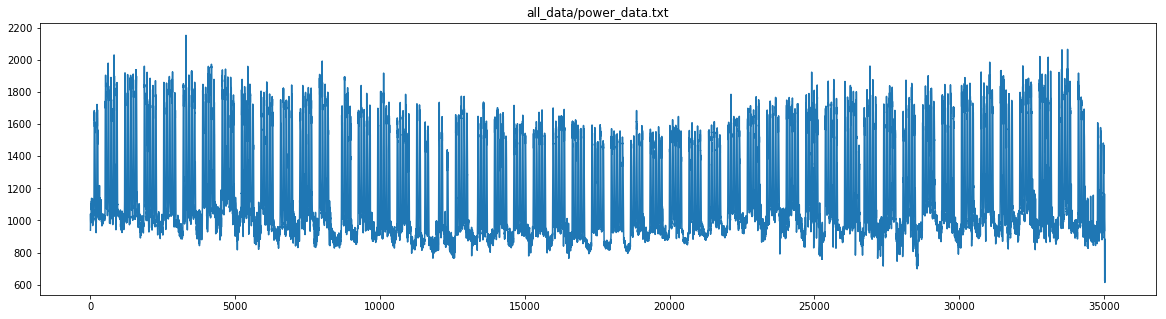

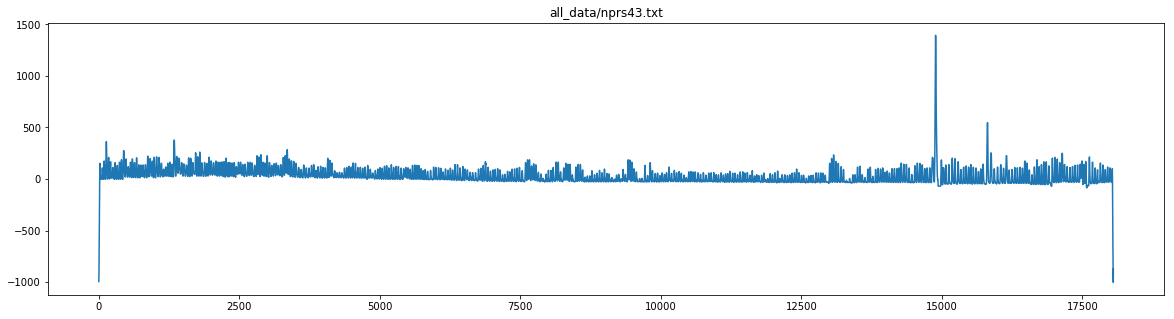

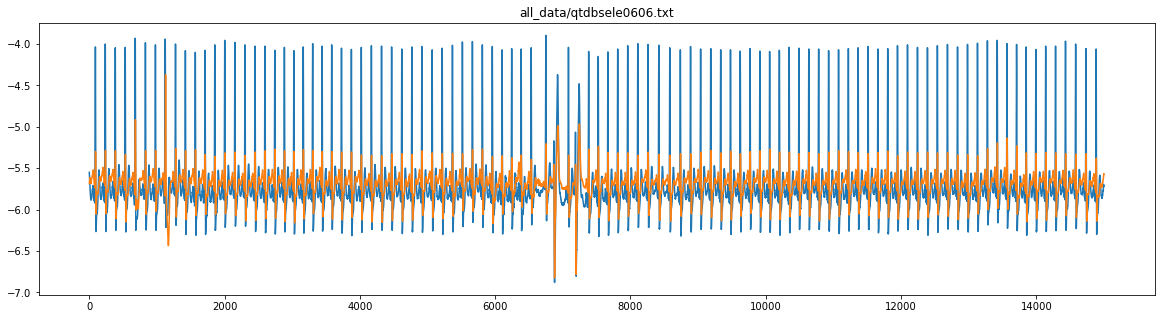

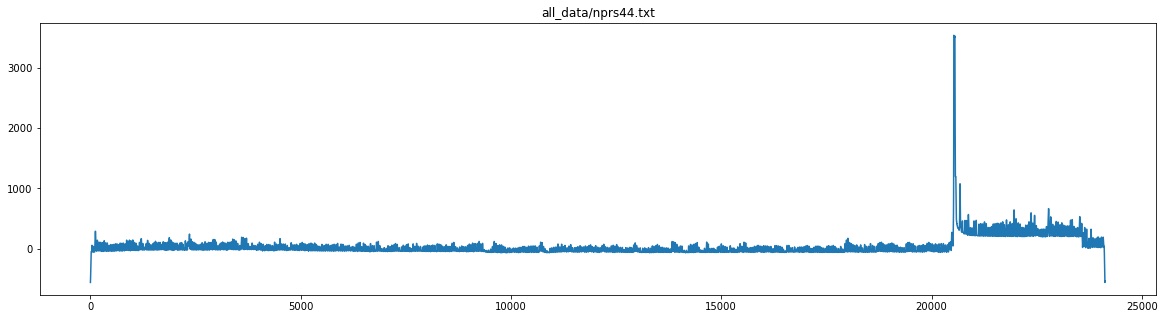

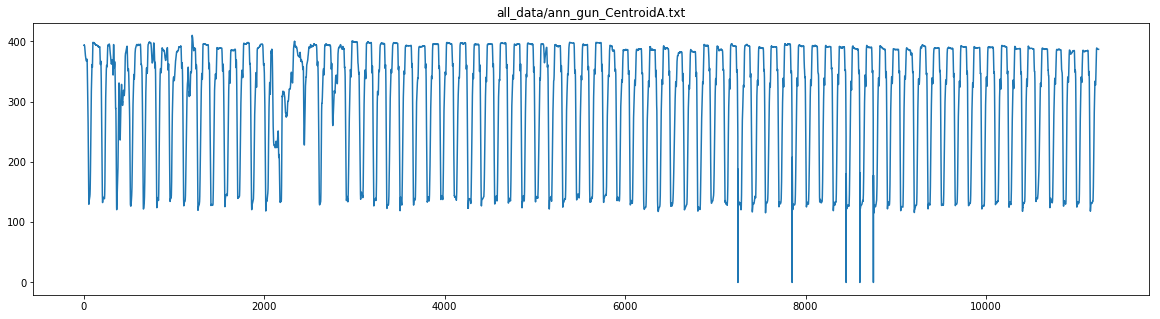

In [153]:
for idx,data in enumerate(datasets):
    plt.figure(figsize=(20,5))
    plt.plot(data)
    plt.title(paths[idx])

# ---------------------------

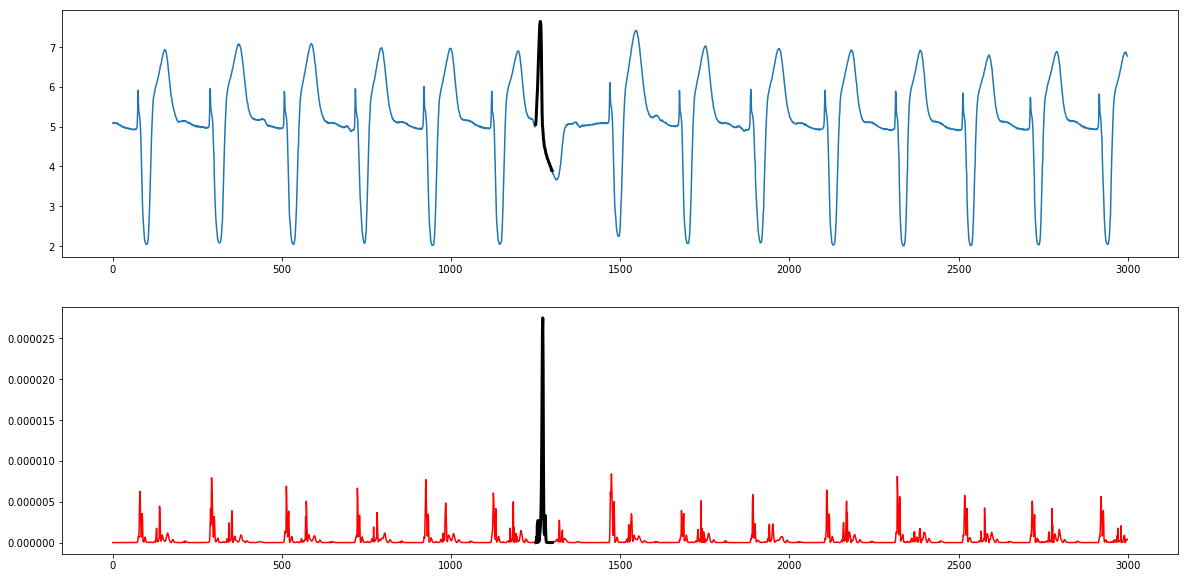

In [263]:
x = datasets[5][3000:6000,1]
sst = SingularSpectrumTransformation(win_length=50,order=10)
score = sst.score_offline(x)

f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x);
ax[1].plot(score,"r")
ax[0].plot(np.arange(1250,1300),x[1250:1300],"k",lw=3)
ax[1].plot(np.arange(1250,1300),score[1250:1300],"k",lw=3)

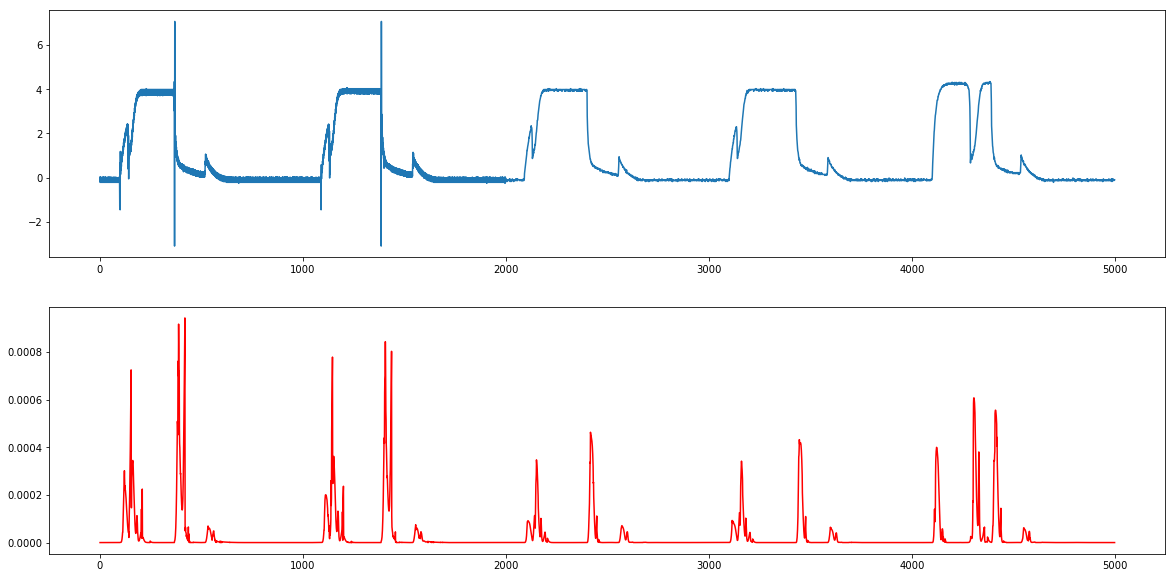

In [182]:
x = datasets[2][:,0]
sst = SingularSpectrumTransformation(win_length=30)
score = sst.score_offline(x)

f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x);
ax[1].plot(score,"r")

(0, 0.0002)

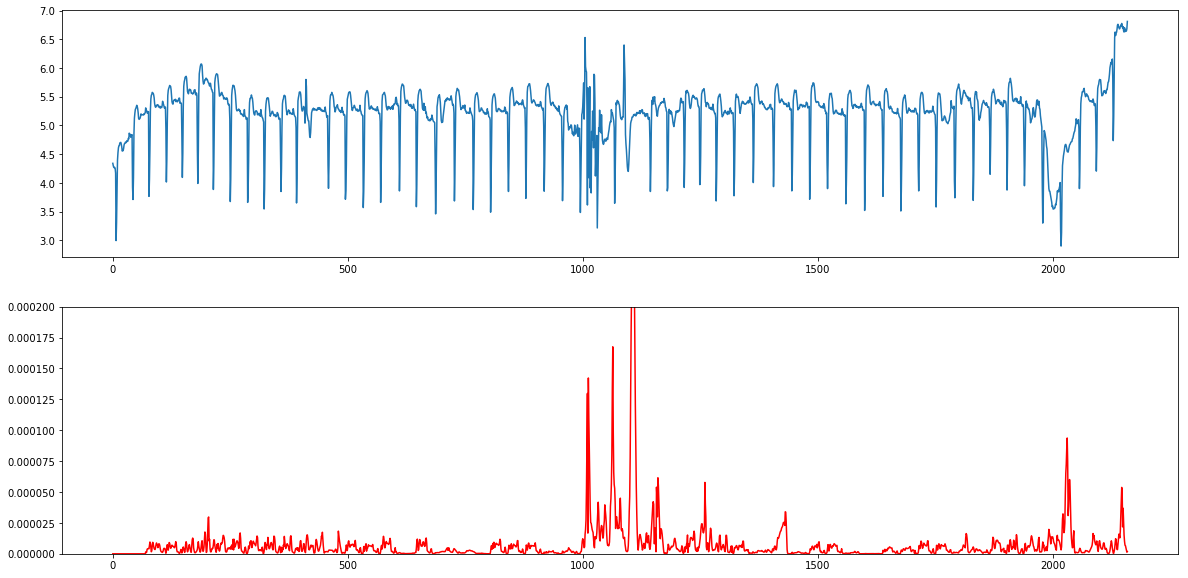

In [306]:
x = datasets[4][:,1][::10]
sst = SingularSpectrumTransformation(win_length=40,order=20)
score = sst.score_offline(x)

f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x);
ax[1].plot(score,"r")
plt.ylim(0,0.0002)

(0, 0.0001)

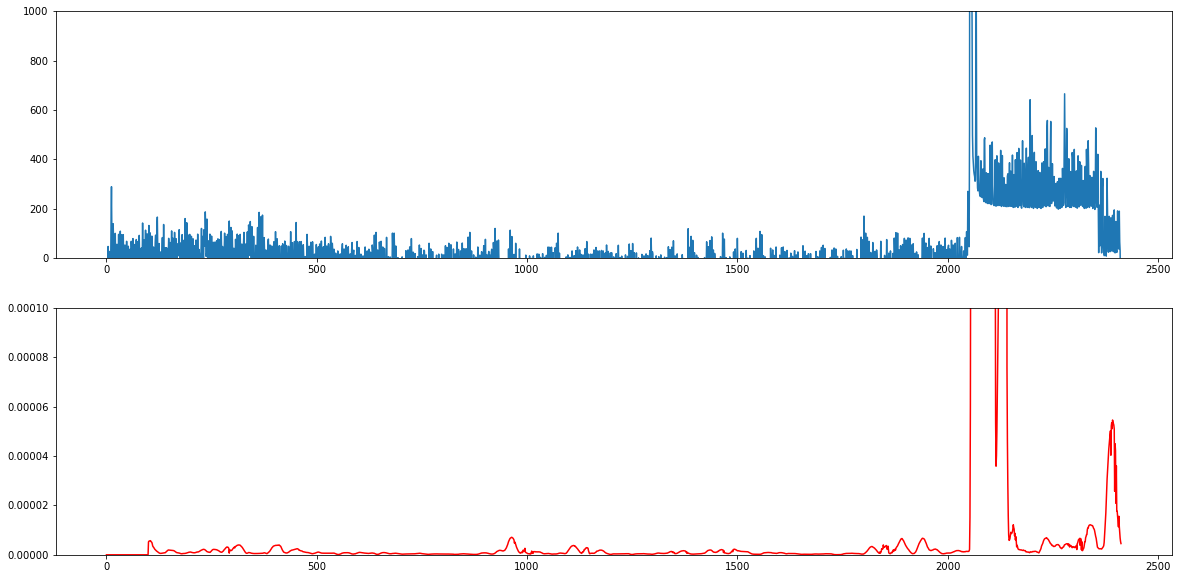

In [252]:
x = datasets[9][:,0][::10]
sst = SingularSpectrumTransformation(win_length=40)
score = sst.score_offline(x)

f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x);
ax[0].set_ylim(0,1000);
ax[1].plot(score,"r")
ax[1].set_ylim(0,0.0001)

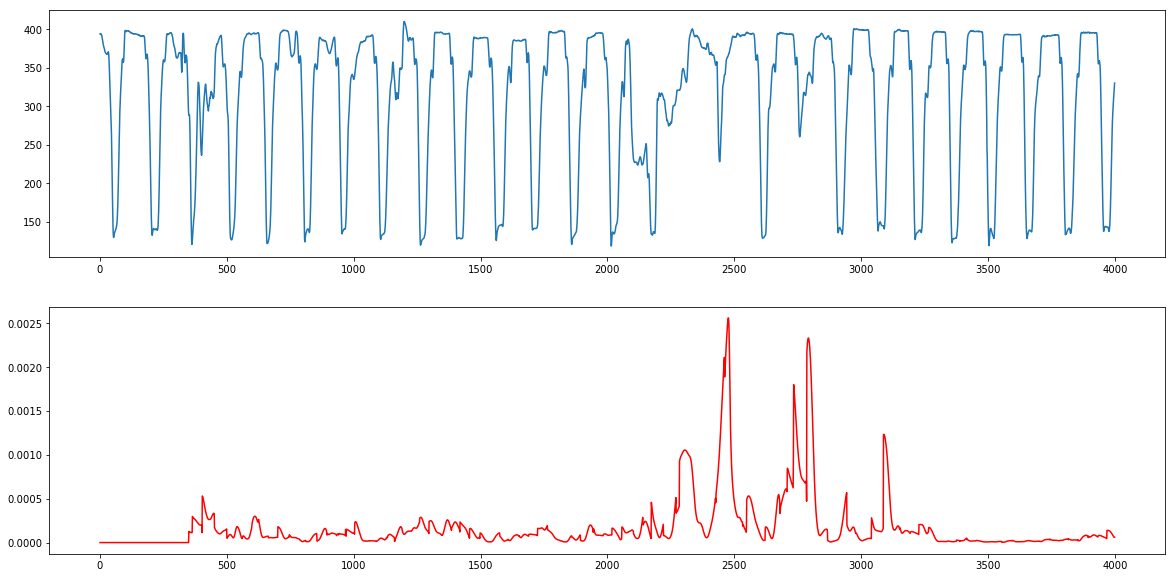

In [341]:
x = datasets[10][:4000,0]
sst = SingularSpectrumTransformation(win_length=140)
score = sst.score_offline(x)

f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x);
ax[1].plot(score,"r")

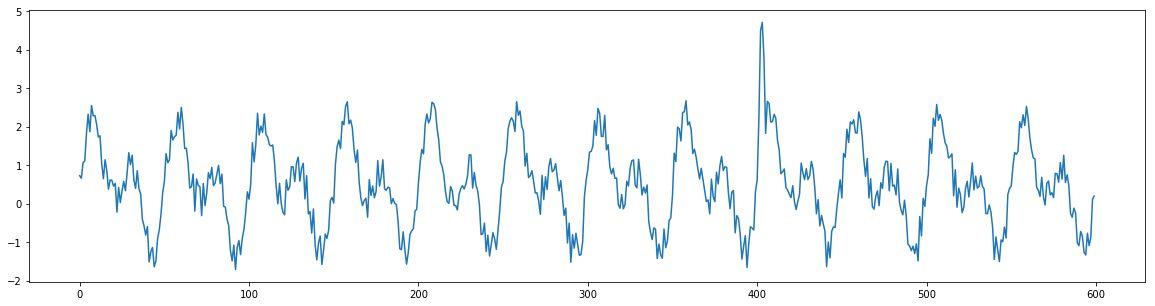

In [68]:
T = 50
Fs = 1/T
t = np.arange(600)
x0 = np.sin(2*np.pi*Fs*t)
x1 = np.sin(2*np.pi*2*Fs*t)
x = x0 + x1
x += np.random.rand(t.size)
x[400:405] += np.sin(2*np.pi*1/5/2*np.arange(5)) * 3
plt.figure(figsize=(20,5))
plt.plot(x)

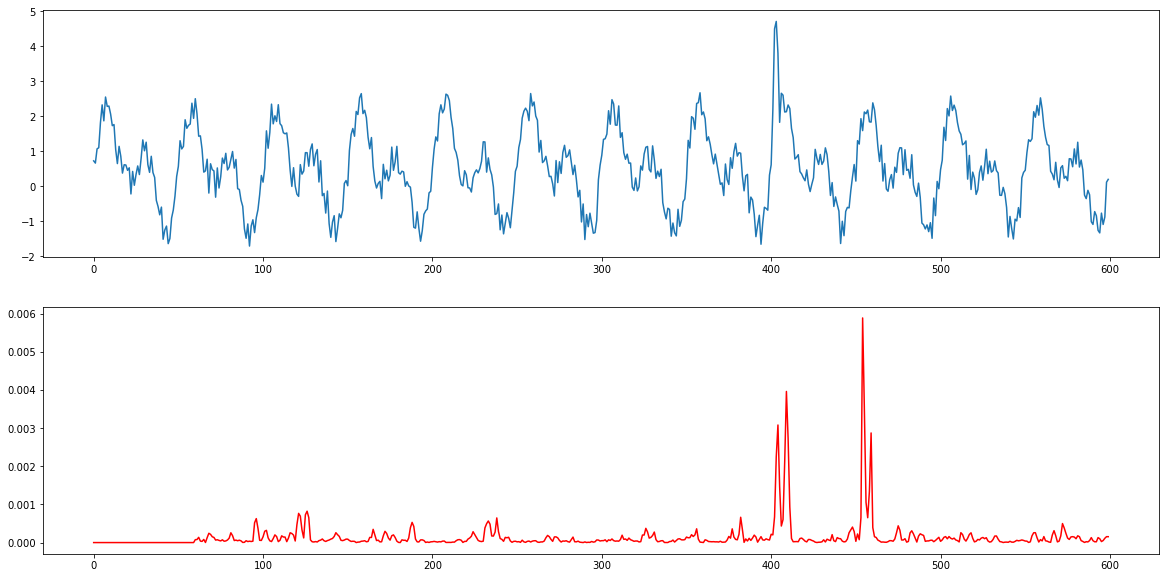

In [88]:
sst = SingularSpectrumTransformation(win_length=5,order=5,lag=50)
score = sst.score_offline(x)

f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x);
ax[1].plot(score,"r")